# Precisamos de um problema.
## https://en.wikipedia.org/wiki/Test_functions_for_optimization
###Booth function
f(x,y) = (x+2y-7)^2 + (2x+y-5)^2

# Achar o valor mínimo da função Booth!

## QUESTÃO 1, 2 e 3

Foram removidas laços de repetições no calculo da roleta e no calculo da pontuação

Nenhuma das duas mudanças melhoraram o resultado

In [1]:
import numpy as np
import random

In [2]:
def calcular_pontuacao(populacao):
    x = populacao[:, 0]
    y = populacao[:, 1]
    
    return (x + 2*y - 7)**2 + (2*x + y - 5)**2

In [3]:
def calculo_roleta(pontuacoes):
    pontuacoes -= pontuacoes.min() 

    roleta = np.array([])
    
    total = np.sum(pontuacoes)
    
    repeticoes = np.round(np.absolute((total + 1)/(pontuacoes + 1))).astype('int')

    for i, repeticao in enumerate(repeticoes):
        roleta = np.concatenate((roleta, (repeticao+1)*[i]))
    
    return roleta.astype('int')

In [4]:
def crossover(populacao, g1, g2):
    if random.randint(0, 1):
        g1, g2 = g2, g1
    
    return [populacao[g1][random.randint(0, 1)], populacao[g2][random.randint(0, 1)]]

In [5]:
tam_pop = 10
dimensao = 2
limites = [-10,10]
mutacao = 0.3
epocas = 100

populacao = np.random.uniform(low=limites[0], high=limites[1], size=(tam_pop,2))

for epoca in range(epocas):
    filhos = []
    
    pontuacoes = calcular_pontuacao(populacao)
    
    print(f"Epoca {epoca}\nMenor valor: {min(pontuacoes)}   Individuo: {populacao[pontuacoes == pontuacoes.min()][0]}\n")
    
    roleta = calculo_roleta(pontuacoes)
    
    for tam in range(tam_pop):
        genitor1 = random.choice(roleta)
        genitor2 = random.choice(roleta)
        
        filho = crossover(populacao, genitor1, genitor2)
        
        if random.random() < mutacao:
            filho[random.randint(0, 1)] = random.randint(limites[0], limites[1])
            
        filhos.append(filho)
        
    populacao = np.array(filhos)

Epoca 0
Menor valor: 43.11408184782103   Individuo: [ 5.45393717 -1.78023482]

Epoca 1
Menor valor: 14.07856122834562   Individuo: [-1.78023482  5.04247871]

Epoca 2
Menor valor: 14.07856122834562   Individuo: [-1.78023482  5.04247871]

Epoca 3
Menor valor: 35.499277722490554   Individuo: [-3.          5.04247871]

Epoca 4
Menor valor: 9.518766682718232   Individuo: [0.         5.04247871]

Epoca 5
Menor valor: 9.518766682718232   Individuo: [0.         5.04247871]

Epoca 6
Menor valor: 9.518766682718232   Individuo: [0.         5.04247871]

Epoca 7
Menor valor: 9.518766682718232   Individuo: [0.         5.04247871]

Epoca 8
Menor valor: 9.518766682718232   Individuo: [0.         5.04247871]

Epoca 9
Menor valor: 2.0   Individuo: [0. 4.]

Epoca 10
Menor valor: 2.0   Individuo: [0. 4.]

Epoca 11
Menor valor: 2.0   Individuo: [0. 4.]

Epoca 12
Menor valor: 2.0   Individuo: [0. 4.]

Epoca 13
Menor valor: 2.0   Individuo: [0. 4.]

Epoca 14
Menor valor: 2.0   Individuo: [0. 4.]

Epoca 15
Me

## QUESTÃO 4

In [6]:
def fitness(populacao):
    x = populacao[:, 0]
    y = populacao[:, 1]
    
    return np.cos(x) * np.cos(y) *  np.exp(-np.power(x, 2) - np.power(y, 2))

In [7]:
def algoritmo_genetico(fitness, tam_pop, dimensao, limites, mutacao, epocas):
    populacao = np.random.uniform(low=limites[0], high=limites[1], size=(tam_pop,dimensao))
    
    min_por_epoca = []    
    for epoca in range(epocas):
        filhos = []

        pontuacoes = fitness(populacao)
        
        min_por_epoca.append(min(pontuacoes))

        roleta = calculo_roleta(pontuacoes)

        for tam in range(tam_pop):
            genitor1 = random.choice(roleta)
            genitor2 = random.choice(roleta)

            filho = crossover(populacao, genitor1, genitor2)

            if random.random() < mutacao:
                filho[random.randint(0, 1)] = random.randint(limites[0], limites[1])

            filhos.append(filho)

        populacao = np.array(filhos)
        
    return min_por_epoca

In [8]:
tam_pop = 10
dimensao = 2
limites = [-20, 20]
mutacao = 0.3
epocas = 100

algoritmo_genetico(fitness, tam_pop, dimensao, limites, mutacao, epocas)

[-1.565252325263911e-38,
 -2.4903752694062264e-36,
 -1.5715110265086802e-115,
 -9.192965905401803e-41,
 -6.049610825683713e-36,
 -2.8978020388287236e-19,
 -2.8978020388287236e-19,
 -7.355789907801574e-08,
 -7.31529227173562e-08,
 -7.31529227173562e-08,
 -7.31529227173562e-08,
 -7.31529227173562e-08,
 -7.31529227173562e-08,
 -2.42842058135124e-05,
 -7.31529227173562e-08,
 -1.4620817484991185e-08,
 -2.8978020388287236e-19,
 -2.383234812918406e-47,
 -2.907466673302543e-29,
 -2.907466673302543e-29,
 -3.896729493338332e-99,
 -2.8978020388287236e-19,
 -1.2296745698891264e-55,
 -2.8978020388287236e-19,
 -2.8978020388287236e-19,
 -7.355789907801574e-08,
 -7.355789907801574e-08,
 -7.355789907801574e-08,
 -4.813056533259569e-16,
 -2.8978020388287236e-19,
 -4.813056533259569e-16,
 -2.8978020388287236e-19,
 -2.8978020388287236e-19,
 -2.8978020388287236e-19,
 -4.829108848591151e-26,
 -7.355789907801574e-08,
 -2.8978020388287236e-19,
 -9.43994505555789e-149,
 -2.8978020388287236e-19,
 -1.56791211457

## QUESTÃO 5

So é possivel resolver de forma deterministica limitando um intervalo finito de valores, então nós limitamos o intervalo de [-20, 20] em valores inteiros.

In [9]:
def funcao_objetivo(x, y):
    return np.cos(x) * np.cos(y) *  np.exp(-np.power(x, 2) - np.power(y, 2))

In [10]:
def deterministico(funcao_objetivo, intervalo):
    menor = funcao_objetivo(0, 0)
    x, y = 0, 0

    for i in range(intervalo[0], intervalo[1]+1):
        for j in range(intervalo[0], intervalo[1]+1):
            valor = funcao_objetivo(i, j)

            if valor < menor:
                menor = valor
                x, y = i, j
                
    return menor, x, y

In [11]:
deterministico(funcao_objetivo, [-20, 20])

(-0.007621995182886547, -2, 0)

## QUESTÃO 6

In [12]:
import tracemalloc
import time
import matplotlib.pyplot as plt
%matplotlib inline

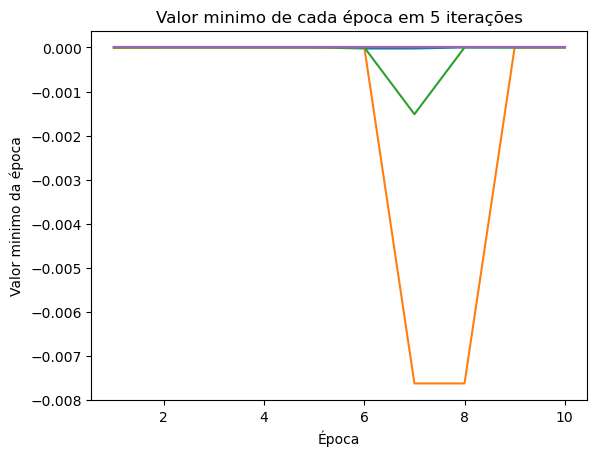

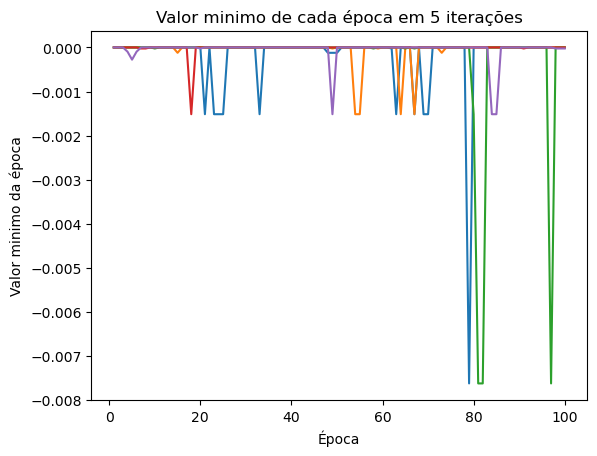

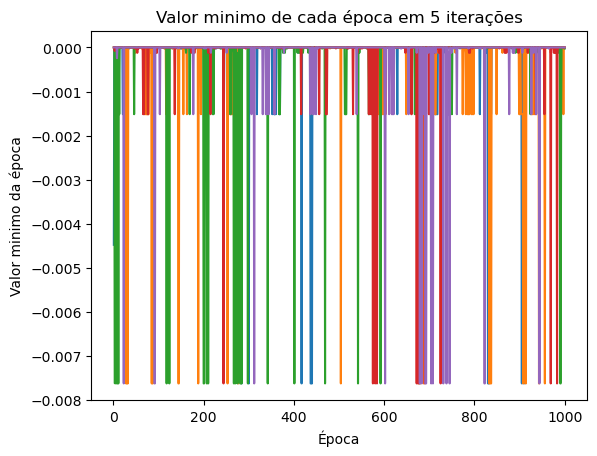

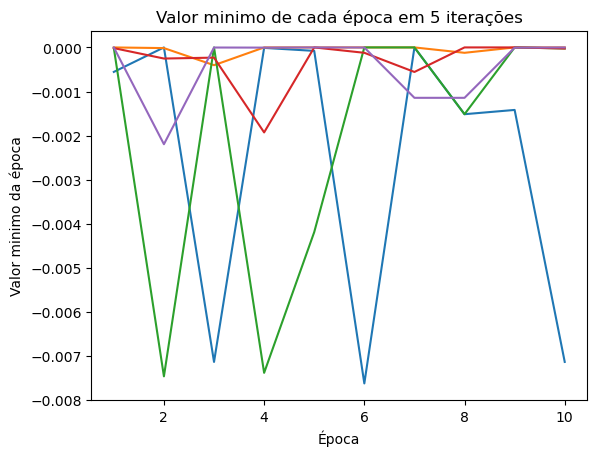

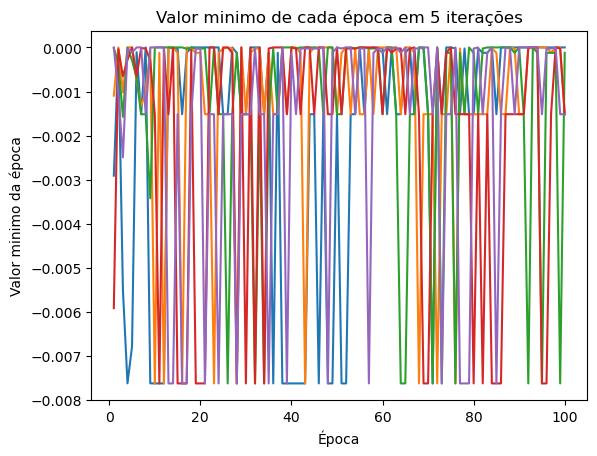

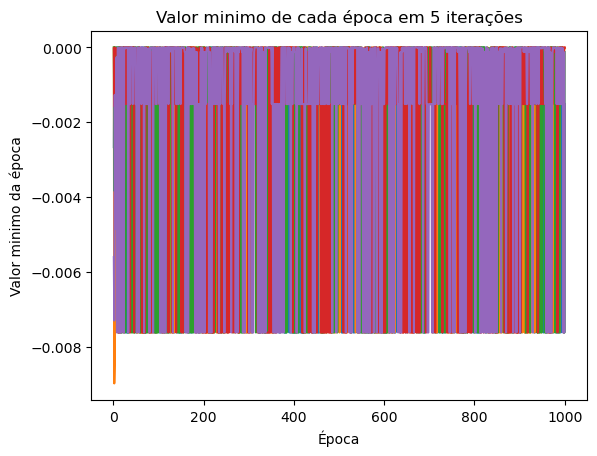

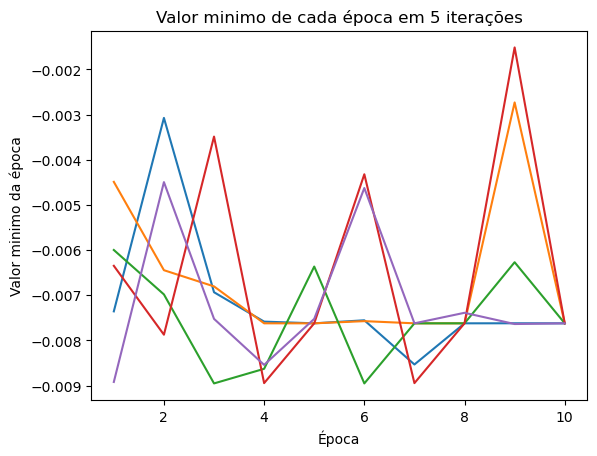

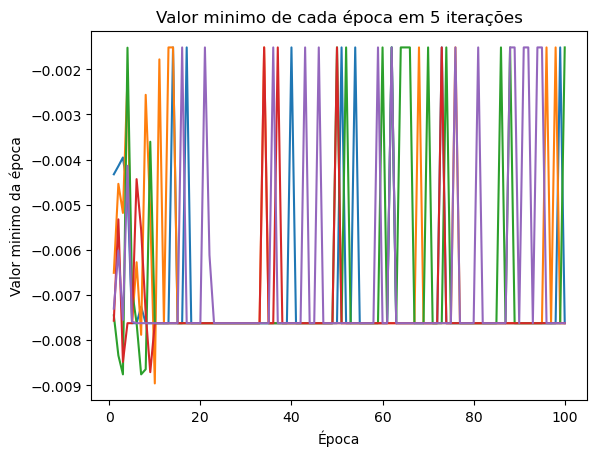

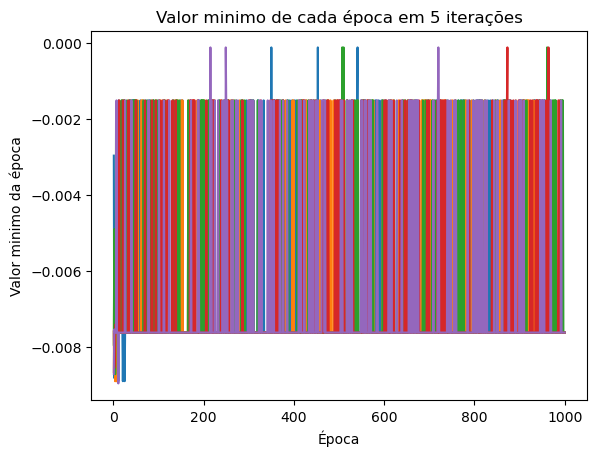

In [13]:
populacoes = [10, 100, 1000]
epocas = [10, 100, 1000]
dimensao = 2
limites = [-20, 20]
mutacao = 0.3

resultados_media = {}

for tam_pop in populacoes:
    for epoca in epocas:
#         print(f'populacao {tam_pop} com {epoca} epocas')
        resultados = {'memoria':{'atual':[], 'pico':[]}, 'tempo':[]}
        
        for i in range(5):
            
            tracemalloc.start()
            
            inicio = time.process_time()

            min_por_epoca = algoritmo_genetico(fitness, tam_pop, dimensao, limites, mutacao, epoca)
            
            fim = time.process_time()
            
            current, peak = tracemalloc.get_traced_memory()

            tracemalloc.stop()
                     
            resultados['memoria']['atual'].append(current)
            resultados['memoria']['pico'].append(peak)
            resultados['tempo'].append(fim-inicio)
            
            # Plot minimos da epoca
            plt.plot(range(1, epoca+1), min_por_epoca, label='xis')
        
        plt.title('Valor minimo de cada época em 5 iterações')
        plt.xlabel('Época')
        plt.ylabel('Valor minimo da época')
        plt.show()
        
        resultados_media[(tam_pop, epoca)] = {'memoria_atual': np.mean(resultados['memoria']['atual']), 
                                              'memoria_pico': np.mean(resultados['memoria']['pico']),
                                              'tempo': np.mean(resultados['tempo'])}
        
#         print(f"Memória Atual media: {np.mean(resultados['memoria']['atual'])} Bytes; Pico medio: {np.mean(resultados['memoria']['pico'])} Bytes")
#         print(f"Tempo cpu medio: {np.mean(resultados['tempo'])} segundos")
#         print()       

In [14]:
resultados = {'memoria':{'atual':[], 'pico':[]}, 'tempo':[]}

for i in range(5):
    tracemalloc.start()
            
    inicio = time.process_time()

    menor, x, y = deterministico(funcao_objetivo, [-20, 20])
            
    fim = time.process_time()
            
    current, peak = tracemalloc.get_traced_memory()

    tracemalloc.stop()
            
    resultados['memoria']['atual'].append(current)
    resultados['memoria']['pico'].append(peak)
    resultados['tempo'].append(fim-inicio)
    
# print(f"Memória Atual media: {np.mean(resultados['memoria']['atual'])} Bytes; Pico medio: {np.mean(resultados['memoria']['pico'])} Bytes")
# print(f"Tempo cpu medio: {np.mean(resultados['tempo'])} segundos")
resultados_media['deterministico'] = {'memoria_atual': np.mean(resultados['memoria']['atual']), 
                                              'memoria_pico': np.mean(resultados['memoria']['pico']),
                                              'tempo': np.mean(resultados['tempo'])}

print(f"Menor valor: {menor}   Individuo: {x, y}\n")

Menor valor: -0.007621995182886547   Individuo: (-2, 0)



In [15]:
x = []
y_memoria_atual = []
y_memoria_pico = []
y_tempo = []

for key, item in resultados_media.items():
    x.append(str(key))
    y_memoria_atual.append(item['memoria_atual'])
    y_memoria_pico.append(item['memoria_pico'])
    y_tempo.append(item['tempo'])

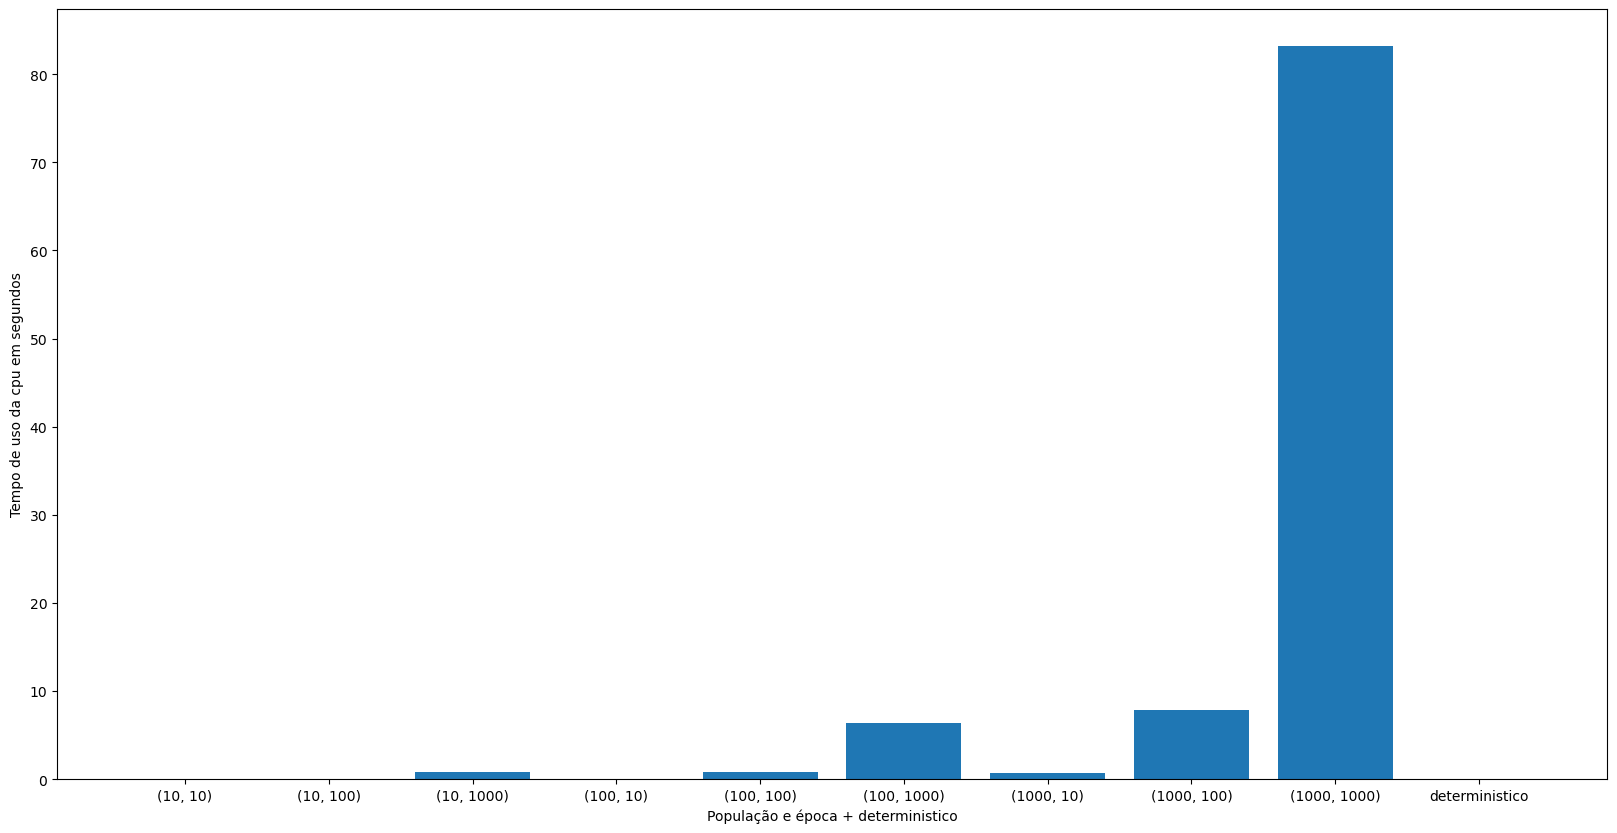

In [20]:
plt.figure(figsize=(20, 10))
plt.bar(x, y_tempo)
plt.xlabel('População e época + deterministico')
plt.ylabel('Tempo de uso da cpu em segundos')
plt.show()

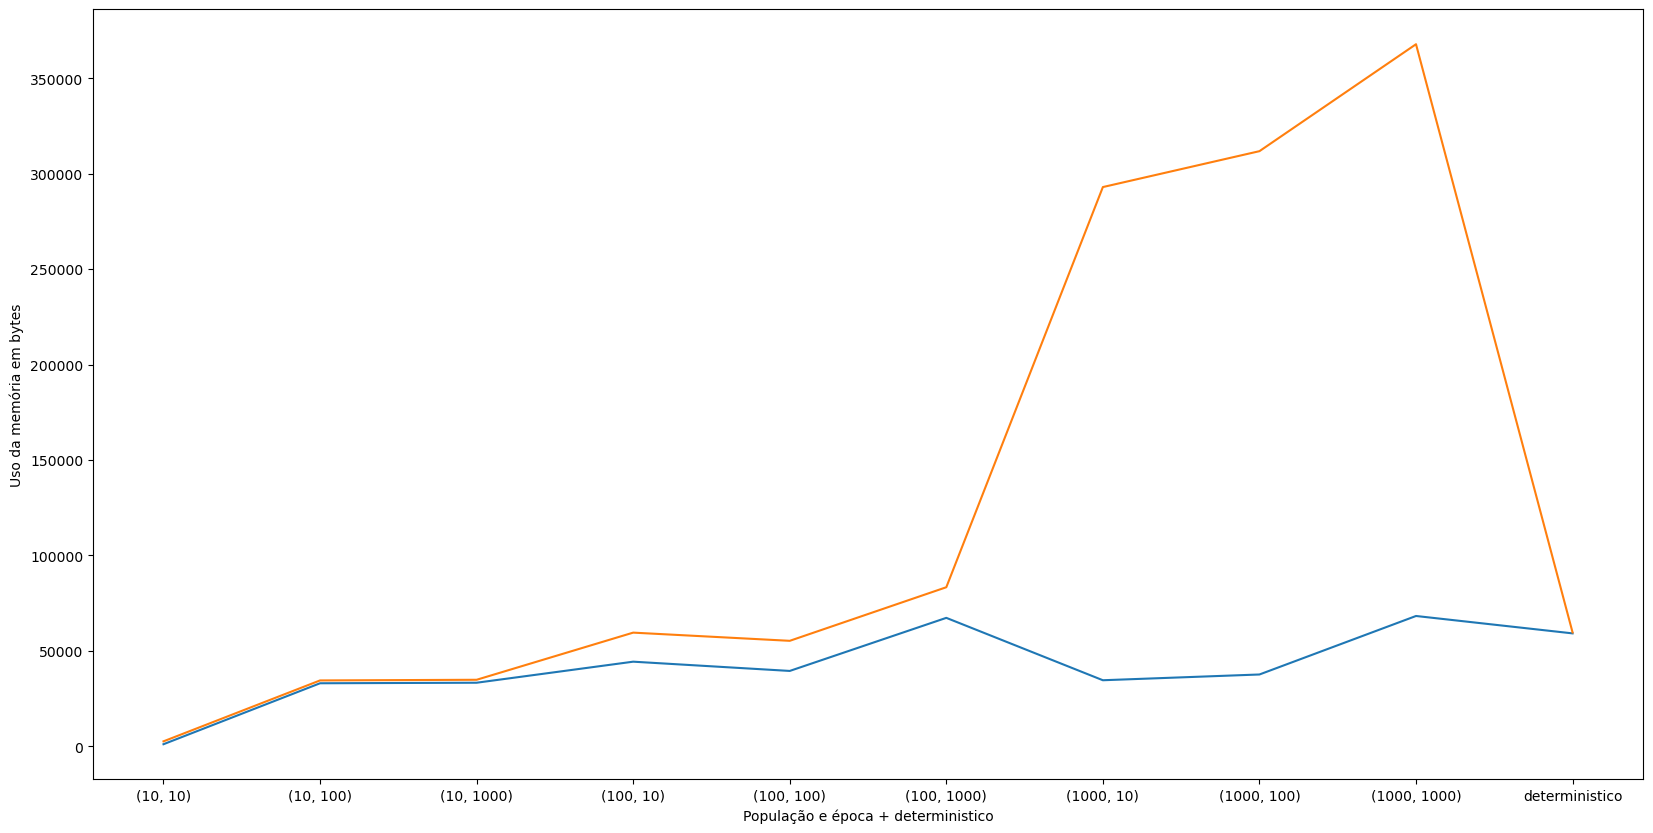

In [22]:
plt.figure(figsize=(20, 10))
plt.plot(x, y_memoria_atual, label='teste')
plt.plot(x, y_memoria_pico)
plt.xlabel('População e época + deterministico')
plt.ylabel('Uso da memória em bytes')
plt.show()